In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('tell.csv')
df.head()

,minutes,reply
0,0.2,n
1,0.2,n
2,0.2,n
3,0.2,n
4,0.2,n


In [ ]:
df.isnull().sum()

minutes    0
reply      0
dtype: int64

In [ ]:
df_dummy = pd.get_dummies(df['reply'])

In [ ]:
X = df[['minutes']]
y = df[['reply']]

In [ ]:
# データ分割で使用するモジュールをインポートする
from sklearn.model_selection import train_test_split

# X, yを訓練データ、テストデータに分割する
# * テストデータに使用する割合を30%、乱数シードは0とする
# * 訓練データの特徴量を格納する変数名はX_trainとする
# * テストデータの特徴量を格納する変数名はX_testとする
# * 訓練データの正解データを格納する変数名はy_trainとする
# * テストデータの正解データを格納する変数名はy_testとする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# scikitlearnの決定木をインポートする
from sklearn import tree

# 決定木モデルを生成し、modelに代入する
# * 最大の深さは2とする
# * 乱数シードは0とする
model = tree.DecisionTreeClassifier(max_depth = 1, random_state = 0)

# 訓練データで学習を実行する
model.fit(X_train, y_train)

# 訓練データの正解率を表示する
print('訓練データでの正解率:', model.score(X_train, y_train))

# テストデータの正解率を表示する
print('テストデータでの正解率:', model.score(X_test, y_test))

訓練データでの正解率: 0.7929373996789727
テストデータでの正解率: 0.7388059701492538


In [ ]:
print("==列名==")
# 特徴量(X_train)の列名を表示する
print(X_train.columns)

print("==分岐条件の列==")
# model(決定木)の分岐条件の列を表示する
print(model.tree_.feature)

print("==閾値==")
# model(決定木)の分岐条件の閾値を表示する
print(model.tree_.threshold)

==列名==
Index(['minutes'], dtype='object')
==分岐条件の列==
[ 0 -2 -2]
==閾値==
[ 5.04999995 -2.         -2.        ]


In [ ]:
print("==リーフの各分類のデータ数==")
# 決定木の各末端ノード(3箇所)について、到達したデータ数を表示する
# ヒント：問26の「分岐条件の列」が「-2」となっているインデックスが、末端ノードのインデックスになる
print(model.tree_.value[1])

print("==各分類の種類==")
# 各分類がどの種類を示しているのかを表示する
print(model.classes_)

==リーフの各分類のデータ数==
[[181. 124.]]
==各分類の種類==
['n' 'y']


[Text(0.5, 0.75, 'minutes <= 5.05\ngini = 0.328\nsamples = 623\nvalue = [494, 129]'),
 Text(0.25, 0.25, 'gini = 0.483\nsamples = 305\nvalue = [181, 124]'),
 Text(0.75, 0.25, 'gini = 0.031\nsamples = 318\nvalue = [313, 5]')]

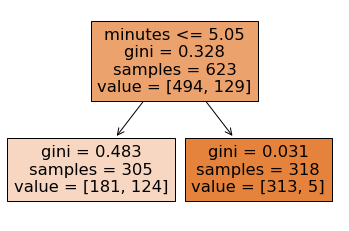

In [ ]:
# X_trainの場合の決定木を描画する

# 描画関数の利用
from sklearn.tree import plot_tree

# plot_tree関数で決定木を描画
plot_tree(model, feature_names = X_train.columns, filled = True)